In [37]:
import tensorflow as tf ## pip install tensorflow-gpu
import cv2 ### pip install opencv-python
        ## pip install opencv-contrib-python  full package

import os # For Folder openings purposes 
from matplotlib import pyplot as plt 
import numpy as np

In [38]:
img_array = cv2.imread("train/0/Training_10118481.jpg") ## Reading the image

In [39]:
img_array.shape ## Size of the image (R,G,B)

(48, 48, 3)

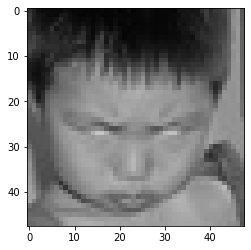

In [40]:
plt.imshow(img_array) ## 0 Class Angry 48*48

In [41]:
# Datadirectory = "train" ## Teaining Dataset

In [42]:
# Classes = ["0","1","2","3","4","5","6"] ## Exact name of Training folder classes

### Reading All the rest of images in a Category loop

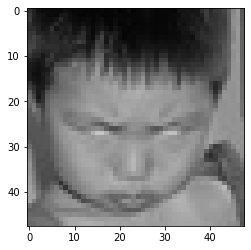

In [43]:
# for category in Classes :
#   path = os.path.join(Datadirectory, category) ## Reading paths by os
#   for img in os.listdir(path) :
#     img_array = cv2.imread(os.path.join(path,img))
#     plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
#     plt.show() ## Showing all images
#     break ## Break to only show one image not all of them
#   break

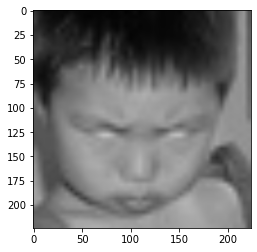

In [44]:
# img_size=224 ## Changing size of image to ImageNet => 224*224
# new_array = cv2.resize(img_array, (img_size,img_size)) ## Saving the size
# plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
# plt.show()

In [45]:
new_array.shape

(224, 224, 3)

### It is common to perform transfer learning with predictive modeling problems that use image data as input,

### This may be a prediction task that takes photographs or video data as input.

### For these types of problems, 
###       it is common to use a deep learning model pre-trained for a large and challenging image classification task such as the ImageNet

### ImageNet is an image database organized according to the WordNet hierarchy,
### in which each node of the hierarchy is depicted thousands of images. 
### The project has been instrumental in advancing computer vision and deep learning research. 
### The data is available for free to researchers for non-commercial use.


## Reading,Rescaling the Dataset

In [46]:
# training_Data = [] ## data

# def create_training_Data():
#   for category in Classes :
#     path = os.path.join(Datadirectory, category)
#     class_num = Classes.index(category)
#     for img in os.listdir(path) :
#       try:
#         img_array = cv2.imread(os.path.join(path,img))
#         new_array = cv2.resize(img_array, (img_size,img_size))
#         training_Data.append([new_array,class_num])
#       except Exception as e:
#         pass

In [47]:
# create_training_Data()

In [48]:
# print(len(training_Data))

28709


In [49]:
# temp = np.array(training_Data)
# temp.shape

(28709, 2)

In [50]:
# import random

# random.shuffle(training_Data)

In [51]:
# X = []
# Y = []

# for features,label in training_Data:
#     X.append(features)
#     Y.append(label)
    
# X = np.array(X).reshape(-1, img_size, img_size, 3)
# X.shape

In [52]:
# X= X/255.0;

In [53]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [54]:
TRAINING_DIR = "train"
training_datagen = ImageDataGenerator(
      rescale = 1./255
)
VALIDATION_DIR = "test"
validation_datagen = ImageDataGenerator(rescale=1 / 255)


In [55]:
train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
  target_size = (224, 224),
  batch_size = 64,
  class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
  target_size = (224, 224),
  batch_size = 64,
  class_mode = 'categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [56]:
from tensorflow import keras
from tensorflow.keras import layers

In [57]:
model = tf.keras.applications.MobileNetV2() ## Pre-trained Model for Transfer Learning

In [58]:
model.summary() ## Model Summery Architecture

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [59]:
base_input = model.layers[0].input ## First Layer
base_output = model.layers[-2].output ## Last Layer

## We need to convert to 7 Classes not 1000

final_output = layers.Dense(128)(base_output) ## Adding new layer after the Output
final_output = layers.Activation('relu')(final_output) ## Activation func.
final_output = layers.Dense(64)(final_output) ## 128,64,7 instead of a fully connected layer
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output) ## Softmax for classification layer

#final_output

new_model = keras.Model(inputs = base_input, outputs= final_output) ## Creating a New Model

new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [60]:
new_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [61]:
new_model.fit(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)


Epoch 1/25
449/449 [==============================] - 3211s 7s/step - loss: 1.2199 - accuracy: 0.5396 - val_loss: 3.0730 - val_accuracy: 0.3473
Epoch 2/25
449/449 [==============================] - 3954s 9s/step - loss: 1.0128 - accuracy: 0.6232 - val_loss: 4.5814 - val_accuracy: 0.3324
Epoch 3/25
449/449 [==============================] - 3943s 9s/step - loss: 0.9242 - accuracy: 0.6549 - val_loss: 2.6948 - val_accuracy: 0.4139
Epoch 4/25
449/449 [==============================] - 3789s 8s/step - loss: 0.8582 - accuracy: 0.6823 - val_loss: 2.1573 - val_accuracy: 0.4507
Epoch 5/25
449/449 [==============================] - 3858s 9s/step - loss: 0.8029 - accuracy: 0.7053 - val_loss: 4.0522 - val_accuracy: 0.3211
Epoch 6/25
449/449 [==============================] - 3756s 8s/step - loss: 0.7403 - accuracy: 0.7305 - val_loss: 2.9913 - val_accuracy: 0.2953
Epoch 7/25
449/449 [==============================] - 3539s 8s/step - loss: 0.6872 - accuracy: 0.7509 - val_loss: 3.5917 - val_accuracy:

In [ ]:
# pip install pyyaml h5py  

In [63]:
new_model.save('Final_ModelV2.h5')

In [ ]:
#new_model = tf.keras.models.load_model('Final_ModelV2.h5')

In [98]:
frame = cv2.imread("natural.jpg")
frame.shape

(183, 275, 3)

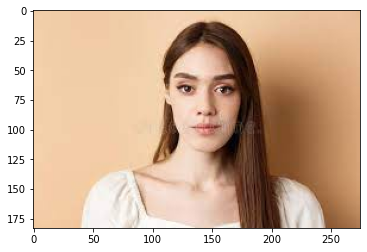

In [99]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

### We Need to crop the face to test the accuracy only on the face 

### for this we used the haar face detection algo

### its an already trained weights for face detection

### it works in Gray images so we need to convert from RGB/BGR to Gray

In [100]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [101]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) ## Converting to Gray image
gray.shape ## The z is gone (x,y,z)

(183, 275)

In [102]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y),(x+w , y+h),(255, 0, 0), 2) ## Blue Color
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("Face not detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

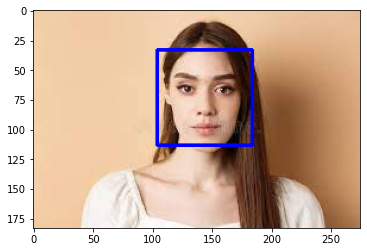

In [103]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

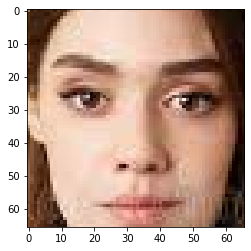

In [104]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB)) ## Cropping the image

In [105]:
final_image = cv2.resize(face_roi, (224,224)) ## Changing the size
final_image = np.expand_dims(final_image,axis=0) ## Resizing !
final_image=final_image/255.0 ## Normalizing

In [106]:
predictions = new_model.predict(final_image) ## Showing the predictions
predictions[0]

array([1.9333338e-04, 3.2810627e-07, 3.9028670e-05, 3.5837883e-04,
       9.8365885e-01, 1.0811912e-03, 1.4668933e-02], dtype=float32)

In [107]:
np.argmax(predictions) ## Showing the Max prediction

4

## Camera

In [1]:
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray=gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y),(x+w , y+h),(255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess)==0:
            print("Face not detected")
        else:
            for(ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew]## Cropping face
                
    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0
    
    font =cv2.FONT_HERSHEY_SIMPLEX
    
    predictions = new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    if (np.argmax(predictions)==0):
        status = "Angry"
        
        x1,y1,w1,h1 = 0,0,175,75
        ## Draw black back ground 
        cv2.rectangle(frame, (x1, x1), (x1 +w1, y1+ h1), (0,0,0), -1)
        ## Put text
        cv2.putText(frame,status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame,status,(100,150),font, 3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
        
    elif (np.argmax(predictions)==1):
        status = "Disguest"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1), (x1 +w1, y1+ h1), (0,0,0), -1)
        cv2.putText(frame,status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame,status,(100,150),font, 3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
        
    elif (np.argmax(predictions)==2):
        status = "Fear"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1), (x1 +w1, y1+ h1), (0,0,0), -1)
        cv2.putText(frame,status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame,status,(100,150),font, 3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
        
    elif (np.argmax(predictions)==3):
        status = "Happy"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1), (x1 +w1, y1+ h1), (0,0,0), -1)
        cv2.putText(frame,status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame,status,(100,150),font, 3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
        
    elif (np.argmax(predictions)==5):
        status = "Sad"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1), (x1 +w1, y1+ h1), (0,0,0), -1)
        cv2.putText(frame,status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame,status,(100,150),font, 3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
        
    elif (np.argmax(predictions)==6):
        status = "Surprised"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1), (x1 +w1, y1+ h1), (0,0,0), -1)
        cv2.putText(frame,status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame,status,(100,150),font, 3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
        
    elif(np.argmax(predictions)==4):
        status = "Neutral"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1), (x1 +w1, y1+ h1), (0,0,0), -1)
        cv2.putText(frame,status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame,status,(100,150),font, 3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
        
    cv2.imshow('Face Emotion Recognition',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


NameError: name 'cv2' is not defined